# HR Analytics using Logistic Regression


Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing impact of employee salaries on retention
- Plot bar charts showing corelation between department and employee retention
- Now build logistic regression model using variables that were narrowed down in step 1
- Measure the accuracy of the model

In [49]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline

In [50]:
# Read in the dataset
df = pd.read_csv("HR_comma_sep.csv")

In [51]:
# Check the first five rows of the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [52]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [53]:
df.shape

(14999, 10)

In [54]:
# There are 3008 duplicated record in the dataset
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [55]:
# Drop uplicated values
df.drop_duplicates(keep="first", inplace=True)

In [56]:
df.shape

(11991, 10)

In [59]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Plot bar charts showing impact of employee salaries on retention

In [57]:
df.left.nunique()

2

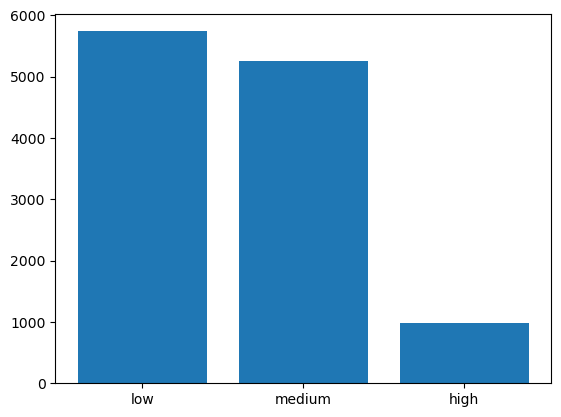

In [58]:
plt.bar(["low", "medium", "high"], df.salary.value_counts());

<BarContainer object of 11991 artists>

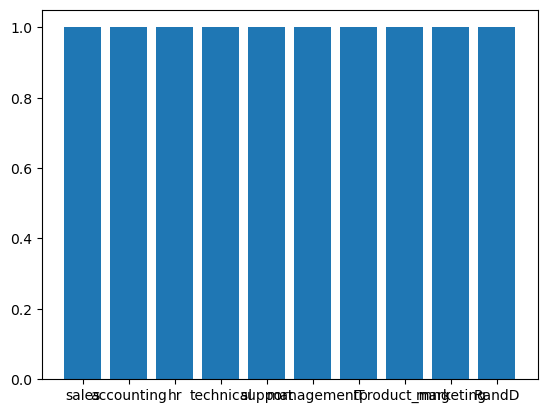

In [60]:
plt.bar(df.Department, df.left)

In [61]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


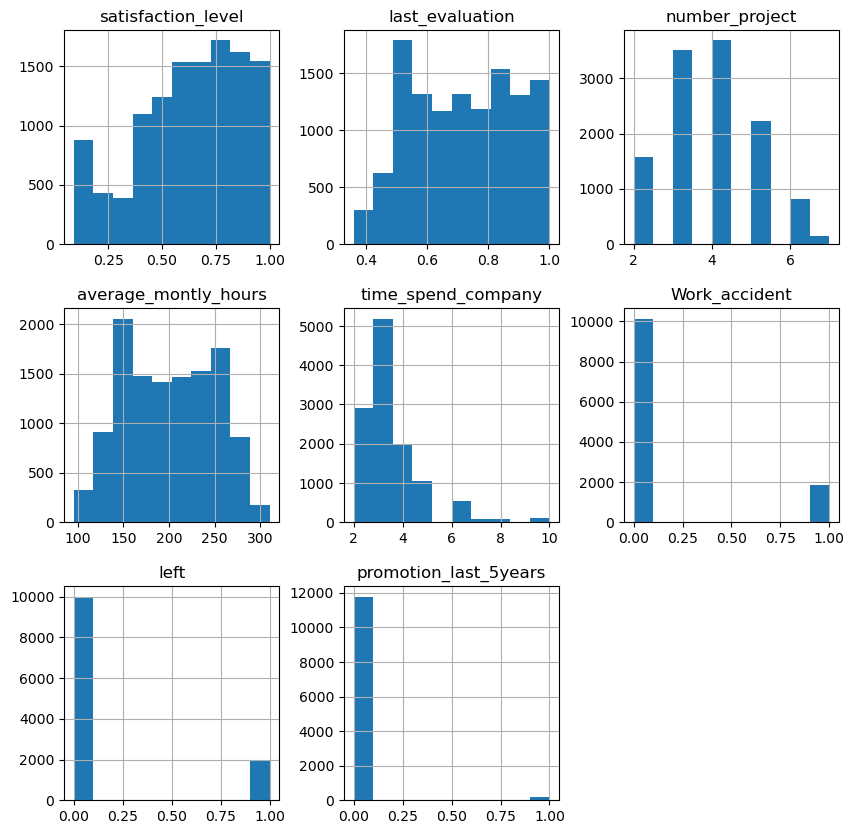

In [35]:
df.hist(figsize=(10,10));

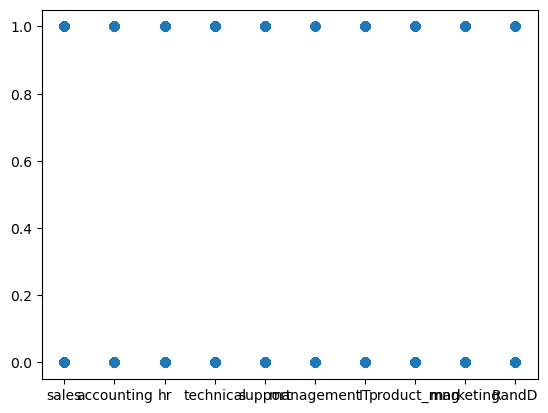

In [37]:
plt.scatter(df.Department, df.left)

In [68]:
# Data Transformation
dummy = pd.get_dummies(df[["Department", "salary"]], drop_first=True)

In [70]:
merged = pd.concat([df, dummy], axis=1)

In [73]:
final = merged.drop(columns=["Department", "salary"])

In [75]:
final.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [76]:
X = final.drop(columns="left", axis=1)

In [77]:
y = final.left

In [86]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [90]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
6426,0.86,0.56,5,141,2,0,0,0,0,0,0,0,0,1,0,0,0,1
288,0.82,0.91,5,232,5,0,0,0,0,0,0,0,0,0,0,1,1,0
5051,0.62,0.52,3,148,3,0,0,0,0,0,0,0,0,1,0,0,0,1
11132,0.43,0.74,4,129,6,0,0,0,0,1,0,0,0,0,0,0,0,1
3687,0.85,0.79,3,156,3,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0.49,0.71,4,178,8,0,0,0,0,0,0,0,0,0,0,0,0,1
5200,0.77,0.52,4,216,3,0,0,0,0,0,0,0,0,1,0,0,0,1
5399,0.84,0.53,5,190,3,0,0,0,0,0,0,0,0,0,0,1,0,1
861,0.43,0.48,2,144,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [91]:
y_train

6426     0
288      1
5051     0
11132    0
3687     0
        ..
11973    0
5200     0
5399     0
861      1
7279     0
Name: left, Length: 9592, dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model = LogisticRegression()

In [94]:
model.fit(X_train, y_train)

C:\Users\TEMITOPE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
model.predict_proba(X_test)

array([[0.31714392, 0.68285608],
       [0.90901115, 0.09098885],
       [0.93611228, 0.06388772],
       ...,
       [0.98763836, 0.01236164],
       [0.89541041, 0.10458959],
       [0.79750442, 0.20249558]])

In [97]:
model.score(X_test, y_test)

0.8299291371404752